# MNIST DATASET TRAINING

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist  # 28x28 images of hadnwritten digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


### MODEL DESIGNING

In [2]:
model = tf.keras.models.Sequential()

# to change to 2D images in dataset to a flattenend numbered image
model.add(tf.keras.layers.Flatten())

# 128 units or neurons => relu is default activation neural function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# softmax for probability function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# complex part of model making
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

# saving model
model.save('mnist.model')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4603 - accuracy: 0.8708
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0199 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0175 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

### Loss and accuracy calculation

In [3]:
# loss and accuracy calculation
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.9743
0.10483210533857346 0.9743000268936157


### Loading model

In [4]:
new_model = tf.keras.models.load_model('mnist.model')

### PREDICTIONS AND PLOTTING

Enter a number to find the position in dataset: 0
predicted number:  7


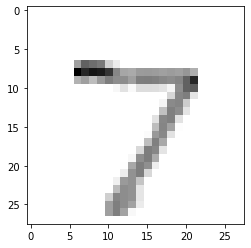

In [5]:
predictions = new_model.predict([x_test])

# probability predictions
# print(predictions)

number = int(input('Enter a number to find the position in dataset: '))

# change this asset
print('predicted number: ', np.argmax(predictions[number]))

# plot showing
# plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.show()
# print(x_train[0])

# for checking the prediction
plt.imshow(x_test[number], cmap=plt.cm.binary)
plt.show()